In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import calplot
import numpy as np
import impute as imp

## Verifying the dataset

In [2]:
tmx=pd.read_csv('../../01_weather_data/01_raw_data/Temixco_2018_N006c.csv',index_col=0,parse_dates=True)
ann_test=pd.read_csv('../../01_weather_data/03_imputing_process/ann_me.csv',index_col=0,parse_dates=True)
sarima_test=pd.read_csv('../../01_weather_data/03_imputing_process/sarima_me.csv',index_col=0,parse_dates=True)


In [3]:
ann_test

,Direct,Global,Temperatura,Humedad,Presion,ws,wd,alturasolar,azimuth,prediccion,minutodia,me,mae
tiempo,,,,,,,,,,,,,
2018-01-01 00:00:00,0.0,0.0,18.70,36.34,87864.11,1.422,316.0,-79.806160,166.773196,0.0,0,0.0,0.0
2018-01-01 00:10:00,0.0,0.0,18.95,35.29,87876.37,1.008,283.7,-81.878940,170.053742,0.0,10,0.0,0.0
2018-01-01 00:20:00,0.0,0.0,18.94,35.43,87888.64,1.565,326.0,-83.764991,173.367191,0.0,20,0.0,0.0
2018-01-01 00:30:00,0.0,0.0,18.77,35.89,87887.21,2.175,354.5,-85.236372,176.703016,0.0,30,0.0,0.0
2018-01-01 00:40:00,0.0,0.0,18.81,36.34,87886.91,1.902,348.0,-85.827949,-179.949903,0.0,40,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 23:10:00,0.0,0.0,18.51,47.29,87484.32,1.715,332.2,-68.725457,151.345160,0.0,1390,0.0,0.0
2018-12-31 23:20:00,0.0,0.0,18.26,48.02,87470.70,1.703,320.5,-71.001501,154.338568,0.0,1400,0.0,0.0
2018-12-31 23:30:00,0.0,0.0,18.39,46.84,87455.03,2.887,335.7,-73.264218,157.400817,0.0,1410,0.0,0.0


findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


Text(0.5, 1.0, 'Daily solar Energy')

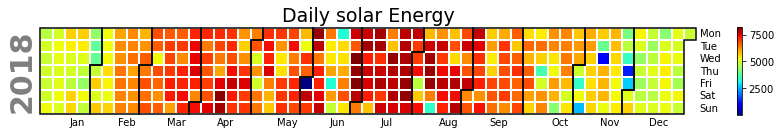

In [4]:
tmx['Eg']=tmx['Ig']/6
tmx_d=tmx.resample('D').sum()
ann_d=ann_test.resample('D').mean()
calplot.calplot(tmx_d['Eg'],cmap='jet',how='sum',edgecolor='black',linewidth=1.5)
plt.title('Daily solar Energy',fontsize=19)

## Pasting 02-June to 01-June

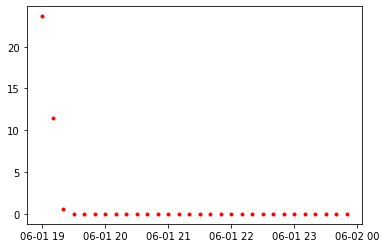

In [5]:
plt.plot(tmx.Ig.loc['2018-06-01'],'r.')

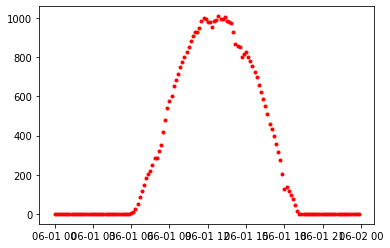

In [6]:
tmx_2=tmx.copy()
tmx['2018-06-01 00:00':'2018-06-02 00:00']=tmx_2['2018-06-02 00:00':'2018-06-03 00:00']
plt.plot(tmx.Ig.loc['2018-06-01'],'r.')
# Sustituir todas las variables

Text(0.5, 1.0, 'Daily solar Energy')

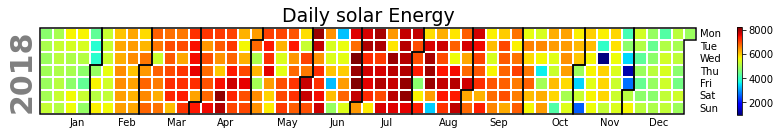

In [7]:
tmx['Eg']=tmx['Ig']/6
tmx_d=tmx.resample('D').sum()
tmx.fillna(0,inplace=True)
calplot.calplot(tmx_d['Eg'],cmap='jet',how='sum',edgecolor='black',linewidth=1.5)
plt.title('Daily solar Energy',fontsize=19)

# Recognizing the days to be selected

### Season 1 January:March

In [8]:
season1='2018-01-01'
season1e='2018-03-31'
imp.maxmin_season(tmx_d,'Eg',season1,season1e)

dia_maximo: 2018-03-29 00:00:00
dia_minimo: 2018-01-30 00:00:00


In [9]:
season1='2018-01-01'
season1e='2018-03-31'
imp.maxmin_season(ann_d,'me',season1,season1e)

dia_maximo: 2018-01-30 00:00:00
dia_minimo: 2018-03-08 00:00:00


### Season 2 Apr:Jun

In [10]:
season2='2018-04-01'
season2e='2018-06-30'
imp.maxmin_season(tmx_d,'Eg',season2,season2e)

dia_maximo: 2018-06-27 00:00:00
dia_minimo: 2018-06-15 00:00:00


In [11]:

imp.maxmin_season(ann_d,'me',season2,season2e)

dia_maximo: 2018-06-15 00:00:00
dia_minimo: 2018-06-27 00:00:00


### Season 3 Jul:Sept

In [12]:
season3='2018-07-01'
season3e='2018-09-30'
imp.maxmin_season(tmx_d,'Eg',season3,season3e)

dia_maximo: 2018-07-28 00:00:00
dia_minimo: 2018-08-12 00:00:00


In [13]:
imp.maxmin_season(ann_d,'me',season3,season3e)

dia_maximo: 2018-08-12 00:00:00
dia_minimo: 2018-07-09 00:00:00


### Season 4 Oct:Dec

In [14]:
season4='2018-10-01'
season4e='2018-12-31'
imp.maxmin_season(tmx_d,'Eg',season4,season4e)

dia_maximo: 2018-10-05 00:00:00
dia_minimo: 2018-11-14 00:00:00


In [15]:
imp.maxmin_season(ann_d,'me',season4,season4e)

dia_maximo: 2018-11-14 00:00:00
dia_minimo: 2018-11-15 00:00:00


## Exporting 2018 complete year 

In [16]:
# tmx.to_csv('../../01_weather_data/03_imputing_process/01_test_data/base_temixco.csv')
#uncomment when necessary

# Deleting the min and max radiation days of each season 

In [17]:
days_solar_radiation=['2018-03-29','2018-01-30','2018-06-27','2018-06-15','2018-07-28','2018-08-12','2018-10-05','2018-11-14']
days_error=[
'2018-01-30', 
'2018-03-08',
'2018-06-15',
'2018-06-27',
'2018-08-12',
'2018-07-09',
# '2018-11-14',
'2018-11-15'
]

print('Deleted days:')
for x in days_error:
    imp.deleting_days(tmx.Ig,x)
    print(x)
    

Deleted days:
2018-01-30
2018-03-08
2018-06-15
2018-06-27
2018-08-12
2018-07-09
2018-11-15


(<Figure size 900x122.4 with 2 Axes>,
 array([<AxesSubplot:ylabel='2018'>], dtype=object))

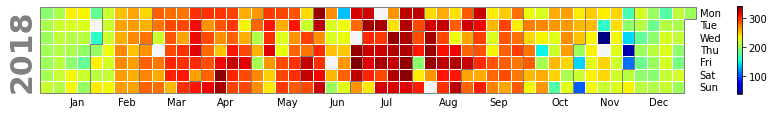

In [18]:

calplot.calplot(tmx.Ig,cmap='jet',how='mean')

### Exporting incomplete csv

In [19]:
tmx.to_csv('../../01_weather_data/03_imputing_process/01_test_data/Temixco_2018_incomplete_maxmin_error_s14Nov.csv')
#Uncomment when needed

In [20]:
tmx

,Ib,Ig,To,RH,WS,WD,P,Eg
time,,,,,,,,
2018-01-01 00:00:00,0.000,0.0,18.70,36.34,1.422,316.0,87864.11,0.0
2018-01-01 00:10:00,0.002,0.0,18.95,35.29,1.008,283.7,87876.37,0.0
2018-01-01 00:20:00,0.170,0.0,18.94,35.43,1.565,326.0,87888.64,0.0
2018-01-01 00:30:00,0.371,0.0,18.77,35.89,2.175,354.5,87887.21,0.0
2018-01-01 00:40:00,0.305,0.0,18.81,36.34,1.902,348.0,87886.91,0.0
...,...,...,...,...,...,...,...,...
2018-12-31 23:10:00,0.125,0.0,18.51,47.29,1.715,332.2,87484.32,0.0
2018-12-31 23:20:00,0.000,0.0,18.26,48.02,1.703,320.5,87470.70,0.0
2018-12-31 23:30:00,0.044,0.0,18.39,46.84,2.887,335.7,87455.03,0.0
